In [30]:
import cartopy.crs as ccrs
import numpy as np
import matplotlib.pyplot as plt

In [31]:
lat_s = 35.0
lat_n = 40.0
lon_e = -118.0
lon_w = -124.0

xy_list = np.load('../../data/pm25_xy_list.npy')
posterior = np.load('80x80_realdata_posterior_nowater_sigma0_5.npy')

def map_coords_to_grid(coords_tuple, elt= 'both', grid_size=80, lat = [lat_s,lat_n], lon = [lon_w,lon_e]):
    '''
    takes in tuple of (lat,lon) in degrees and maps it to values b/w 0 and 1 that fit on discretized 80**2 grid.
    use for source location and sensor mappings
    '''
    lat_deg = coords_tuple[1]
    lon_deg = coords_tuple[0]

    #convert to 80sq grid
    lat_grid = (lat_deg - lat[0])/(lat[1]-lat[0])*grid_size
    lon_grid = (lon_deg - lon[0])/(lon[1] - lon[0])*grid_size

    #round so div to 80, get to [0,1] range
    lat_grid_01 = round(lat_grid)#/grid_size
    lon_grid_01 = round(lon_grid)#/grid_size
    if elt == 'lat':
        return lat_grid_01
    elif elt == 'lon':
        return lon_grid_01
    else:
        return lon_grid_01, lat_grid_01            

def map_grid_to_coords(coords_tuple, elt='both', grid_size=80, lat= [lat_s, lat_n], lon = [lon_w,lon_e]):
    lat_ind = coords_tuple[1]
    lon_ind = coords_tuple[0]

    #convert to lat/lon
    lat_grid = lat_ind/grid_size * (lat[1] - lat[0]) + lat[0]
    lon_grid = lon_ind/grid_size * (lon[1] - lon[0]) + lon[0]
    lat_grid_01 = lat_grid#/grid_size
    lon_grid_01 = lon_grid#/grid_size
    if elt == 'lat':
        return lat_grid_01
    elif elt == 'lon':
        return lon_grid_01
    else:
        return lon_grid_01, lat_grid_01      

la,lo = map_coords_to_grid((-119,36))

In [32]:
sigma = 0.5
latlon_list = [map_grid_to_coords(i,grid_size=80) for i in xy_list]
true_fire_loc = (-121.43,39.81)
xy_fire = map_coords_to_grid(true_fire_loc)

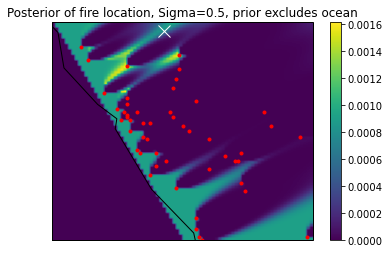

In [33]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
p = np.flip(posterior, 0)

plt.imshow(p, extent=[lon_w, lon_e, lat_s, lat_n])
plt.colorbar()

for ll in latlon_list:
    plt.plot(ll[0],ll[1],marker='.',color='red')

plt.plot(true_fire_loc[0], true_fire_loc[1],marker='x',color='white',markersize=12)
plt.title('Posterior of fire location, Sigma='+str(sigma)+', prior excludes ocean')
plt.xlabel('longitude')
plt.ylabel('latitude')

casename = "80x80_realdata_posterior_nowater_sigma0_5"
plt.savefig(casename + ".png")